In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nibabel as nib
import tensorflow as tf
import numpy as np
from skimage.transform import resize
import os,glob

## Skull Stripping Extractor from DeepBrain


In [ ]:


PB_FILE = "/content/drive/MyDrive/skull_stripping_model/graph_v2.pb"
#CHECKPOINT_DIR = os.path.join(os.path.dirname(__file__), "models", "extractor", "v2")


class Extractor:

    def __init__(self):
        self.SIZE = 128
        self.load_pb()

    def load_pb(self):
        graph = tf.Graph()
        self.sess = tf.compat.v1.Session(graph=graph)
        with tf.io.gfile.GFile(PB_FILE, 'rb') as f:
            graph_def = tf.compat.v1.GraphDef()
            graph_def.ParseFromString(f.read())
            with self.sess.graph.as_default():
                tf.import_graph_def(graph_def)

        self.img = graph.get_tensor_by_name("import/img:0")
        self.training = graph.get_tensor_by_name("import/training:0")
        self.dim = graph.get_tensor_by_name("import/dim:0")
        self.prob = graph.get_tensor_by_name("import/prob:0")
        self.pred = graph.get_tensor_by_name("import/pred:0")

    '''def load_ckpt(self):
        self.sess = tf.Session()
        ckpt_path = tf.train.latest_checkpoint(CHECKPOINT_DIR)
        saver = tf.train.import_meta_graph('{}.meta'.format(ckpt_path))
        saver.restore(self.sess, ckpt_path)

        g = tf.get_default_graph()

        self.img = g.get_tensor_by_name("img:0")
        self.training = g.get_tensor_by_name("training:0")
        self.dim = g.get_tensor_by_name("dim:0")
        self.prob = g.get_tensor_by_name("prob:0")
        self.pred = g.get_tensor_by_name("pred:0")'''

    def run(self, image):
        shape = image.shape
        img = resize(image, (self.SIZE, self.SIZE, self.SIZE), mode='constant', anti_aliasing=True)
        img = (img / np.max(img))
        img = np.reshape(img, [1, self.SIZE, self.SIZE, self.SIZE, 1])

        prob = self.sess.run(self.prob, feed_dict={self.training: False, self.img: img}).squeeze()
        prob = resize(prob, (shape), mode='constant', anti_aliasing=True)
        return prob


## Skull stripping for control_data images
### creates brain images and mask of brain images in respective folders

In [ ]:
for index, filename in enumerate(sorted(glob.glob("/content/drive/MyDrive/control_data/*/*/*/*/*/*"))):
  print('control'+str(index))
  print(filename)
  img = nib.load(filename)
  affine = img.affine
  img = img.get_fdata()
  ext = Extractor()

  prob = ext.run(img)

  mask = prob > 0.5


  brain_mask = (1 * mask).astype(np.uint8)
  brain_mask = nib.Nifti1Image(brain_mask, affine)
  nib.save(brain_mask, os.path.join("/content/drive/MyDrive/control_mask",'control'+str(index)+ "-brain_mask.nii"))

  brain = img[:]
  brain[~mask] = 0
  brain = nib.Nifti1Image(brain, affine)
  nib.save(brain, os.path.join("/content/drive/MyDrive/control_brain",'control'+str(index)+ "-brain.nii"))

control0
/content/drive/MyDrive/control_data/ABIDE/50030/MP-RAGE/2000-01-01_00_00_00.0/S165371/ABIDE_50030_MRI_MP-RAGE_br_raw_20120830231938380_S165371_I329381_control.nii
control1
/content/drive/MyDrive/control_data/ABIDE/50031/MP-RAGE/2000-01-01_00_00_00.0/S165155/ABIDE_50031_MRI_MP-RAGE_br_raw_20120830212226458_S165155_I329165_control.nii
control2
/content/drive/MyDrive/control_data/ABIDE/50032/MP-RAGE/2000-01-01_00_00_00.0/S164792/ABIDE_50032_MRI_MP-RAGE_br_raw_20120830183522276_S164792_I328802_control.nii
control3
/content/drive/MyDrive/control_data/ABIDE/50033/MP-RAGE/2000-01-01_00_00_00.0/S165459/ABIDE_50033_MRI_MP-RAGE_br_raw_20120831001002079_S165459_I329469_control.nii
control4
/content/drive/MyDrive/control_data/ABIDE/50034/MP-RAGE/2000-01-01_00_00_00.0/S164945/ABIDE_50034_MRI_MP-RAGE_br_raw_20120830193114599_S164945_I328955_control.nii
control5
/content/drive/MyDrive/control_data/ABIDE/50035/MP-RAGE/2000-01-01_00_00_00.0/S164432/ABIDE_50035_MRI_MP-RAGE_br_raw_20120830160002

In [ ]:
! pip install nibabel
! pip install nilearn

     |████████████████████████████████| 9.6 MB 7.6 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


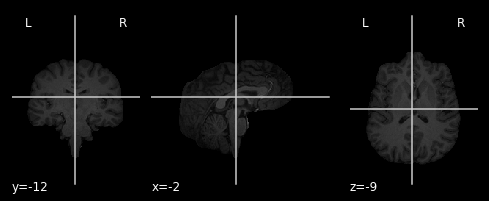

In [ ]:
c = nib.load("/content/drive/MyDrive/control_brain/control0-brain.nii")
plot_anat(c)

### Visualization of skull stripped control brain images

/content/drive/MyDrive/control_brain/control0-brain.nii
/content/drive/MyDrive/control_brain/control0-brain.nii
/content/drive/MyDrive/control_brain/control1-brain.nii
/content/drive/MyDrive/control_brain/control1-brain.nii
/content/drive/MyDrive/control_brain/control2-brain.nii
/content/drive/MyDrive/control_brain/control2-brain.nii
/content/drive/MyDrive/control_brain/control3-brain.nii
/content/drive/MyDrive/control_brain/control3-brain.nii
/content/drive/MyDrive/control_brain/control4-brain.nii
/content/drive/MyDrive/control_brain/control4-brain.nii
/content/drive/MyDrive/control_brain/control5-brain.nii
/content/drive/MyDrive/control_brain/control5-brain.nii
/content/drive/MyDrive/control_brain/control6-brain.nii
/content/drive/MyDrive/control_brain/control6-brain.nii
/content/drive/MyDrive/control_brain/control7-brain.nii
/content/drive/MyDrive/control_brain/control7-brain.nii
/content/drive/MyDrive/control_brain/control8-brain.nii
/content/drive/MyDrive/control_brain/control8-br

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_slicers.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


/content/drive/MyDrive/control_brain/control21-brain.nii
/content/drive/MyDrive/control_brain/control21-brain.nii
/content/drive/MyDrive/control_brain/control22-brain.nii
/content/drive/MyDrive/control_brain/control22-brain.nii
/content/drive/MyDrive/control_brain/control23-brain.nii
/content/drive/MyDrive/control_brain/control23-brain.nii


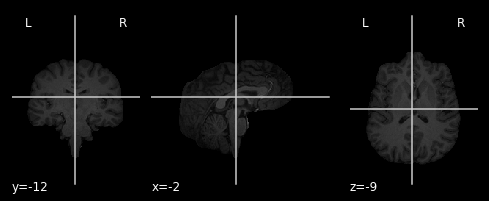

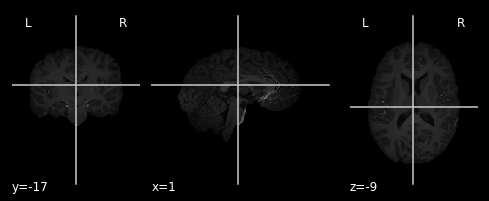

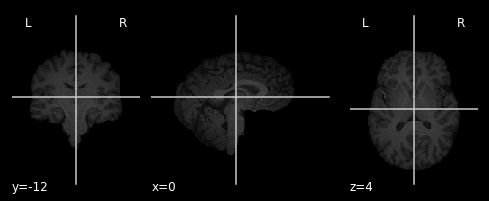

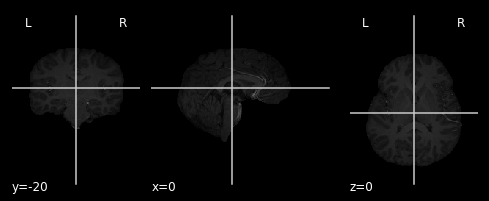

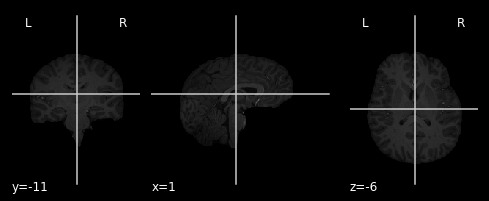

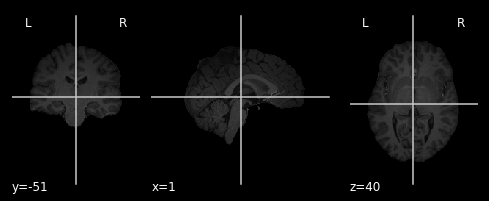

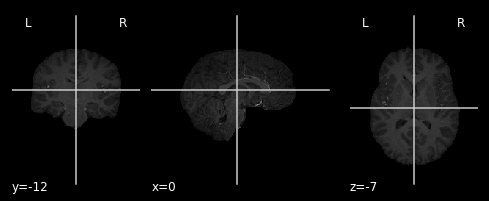

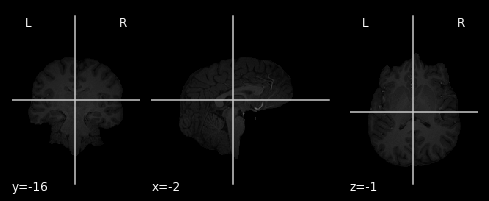

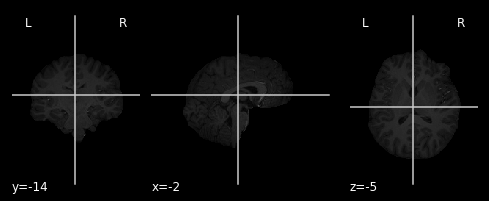

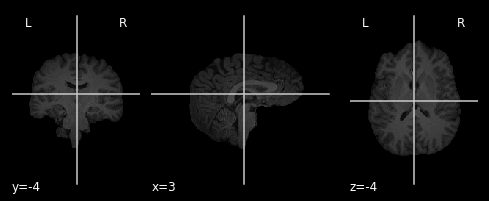

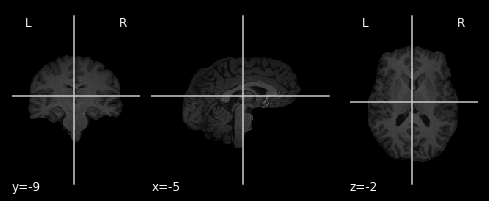

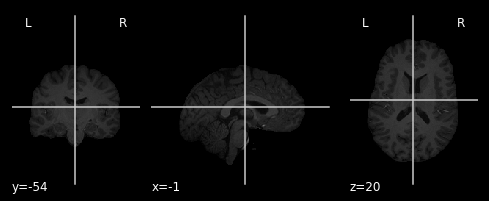

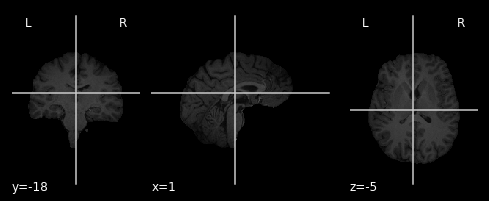

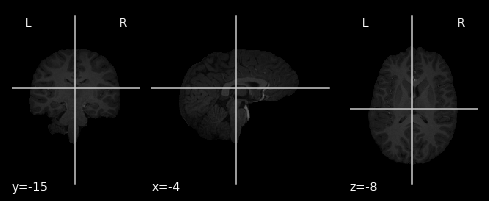

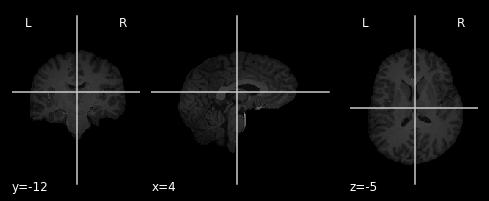

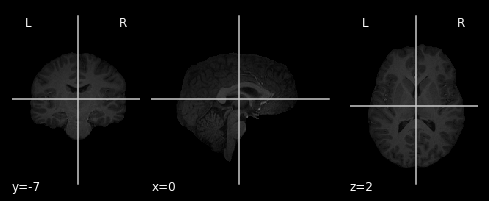

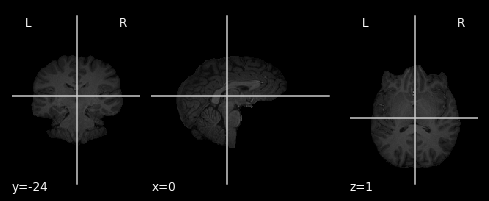

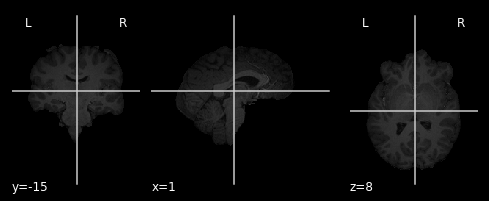

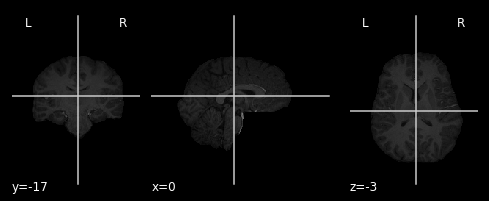

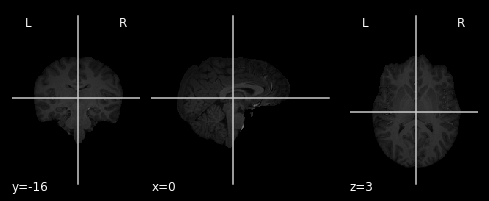

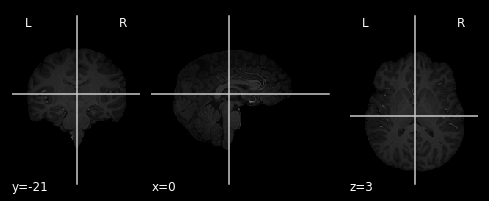

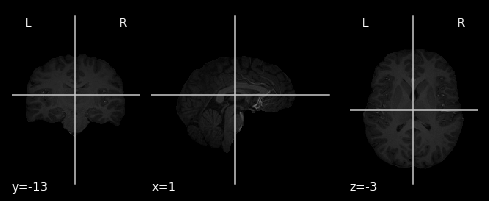

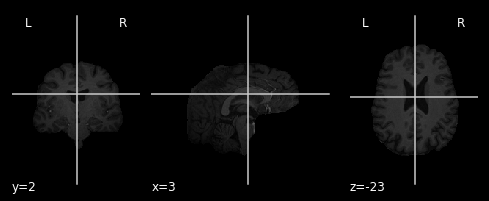

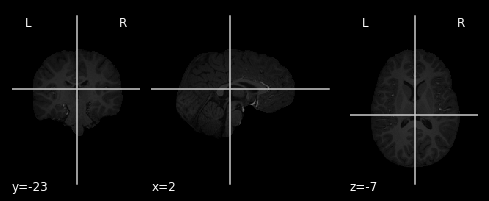

In [ ]:
from nilearn.plotting import view_img,plot_glass_brain,plot_anat,plot_epi
from nibabel.testing import data_path
for i in glob.glob("/content/drive/MyDrive/control_brain/*"):
  print(i)
  example = os.path.join(data_path,i)
  print(example)
  c = nib.load(example)
  plot_anat(c)

## Skull stripping for Autism_data images
### creates brain images and mask of brain images in respective folders

In [ ]:
for index, filename in enumerate(sorted(glob.glob("/content/drive/MyDrive/Autism_data/*/*/*/*/*/*"))):
  print('Autism'+str(index))
  print(filename)
  img = nib.load(filename)
  affine = img.affine
  img = img.get_fdata()
  ext = Extractor()

  prob = ext.run(img)

  mask = prob > 0.5


  brain_mask = (1 * mask).astype(np.uint8)
  brain_mask = nib.Nifti1Image(brain_mask, affine)
  nib.save(brain_mask, os.path.join("/content/drive/MyDrive/Autism_mask",'Autism'+str(index)+ "-brain_mask.nii"))

  brain = img[:]
  brain[~mask] = 0
  brain = nib.Nifti1Image(brain, affine)
  nib.save(brain, os.path.join("/content/drive/MyDrive/Autism_brain",'Autism'+str(index)+ "-brain.nii"))

Autism0
/content/drive/MyDrive/Autism_data/ABIDE/50002/MP-RAGE/2000-01-01_00_00_00.0/S164623/ABIDE_50002_MRI_MP-RAGE_br_raw_20120830172854796_S164623_I328631_Autism.nii
Autism1
/content/drive/MyDrive/Autism_data/ABIDE/50003/MP-RAGE/2000-01-01_00_00_00.0/S164416/ABIDE_50003_MRI_MP-RAGE_br_raw_20120830155445855_S164416_I328410_Autism.nii
Autism2
/content/drive/MyDrive/Autism_data/ABIDE/50004/MP-RAGE/2000-01-01_00_00_00.0/S164726/ABIDE_50004_MRI_MP-RAGE_br_raw_20120830181140636_S164726_I328736_Autism.nii
Autism3
/content/drive/MyDrive/Autism_data/ABIDE/50005/MP-RAGE/2000-01-01_00_00_00.0/S165234/ABIDE_50005_MRI_MP-RAGE_br_raw_20120830220635982_S165234_I329244_Autism.nii
Autism4
/content/drive/MyDrive/Autism_data/ABIDE/50006/MP-RAGE/2000-01-01_00_00_00.0/S165414/ABIDE_50006_MRI_MP-RAGE_br_raw_20120830234259859_S165414_I329424_Autism.nii
Autism5
/content/drive/MyDrive/Autism_data/ABIDE/50007/MP-RAGE/2000-01-01_00_00_00.0/S165121/ABIDE_50007_MRI_MP-RAGE_br_raw_20120830205554190_S165121_I3291

### Visualization of Autism Brain Images

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_slicers.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


KeyboardInterrupt: ignored

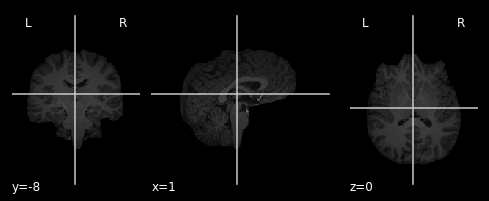

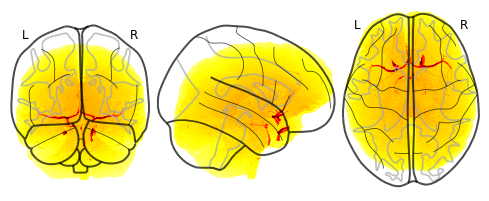

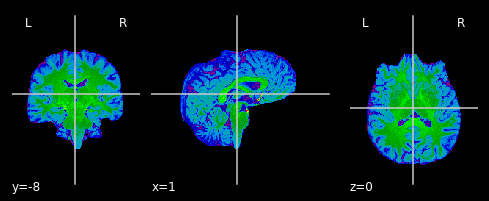

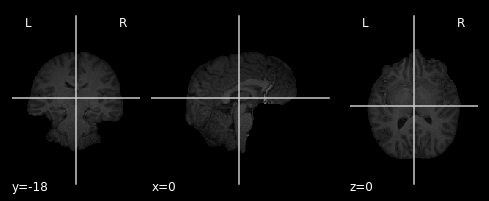

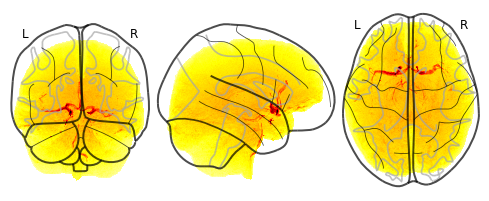

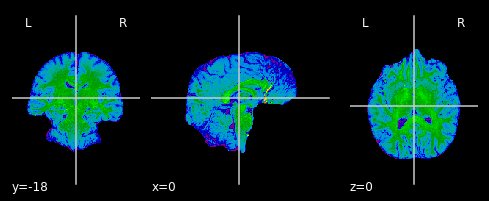

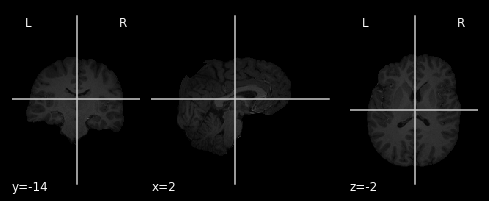

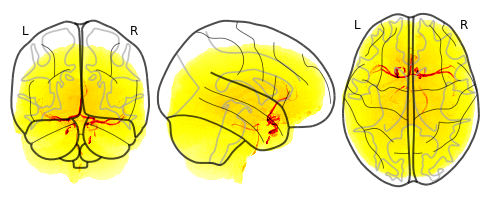

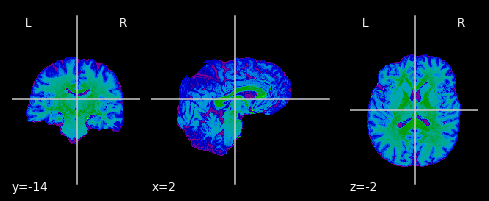

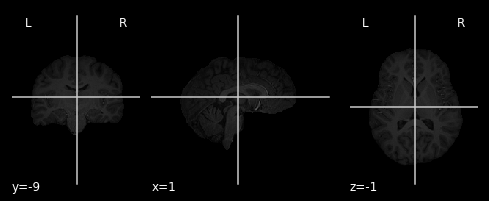

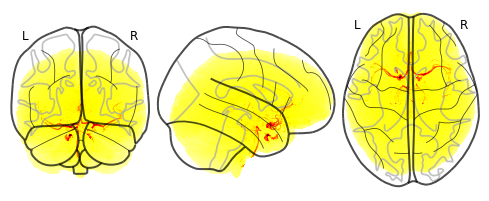

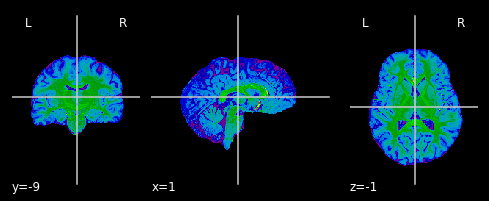

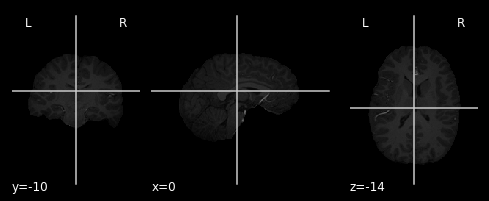

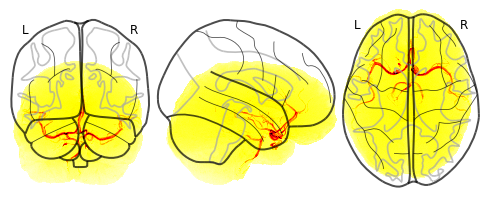

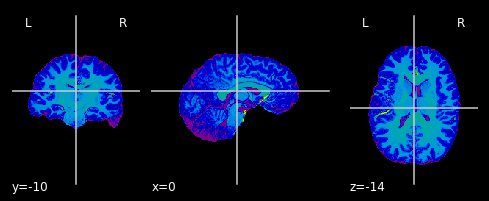

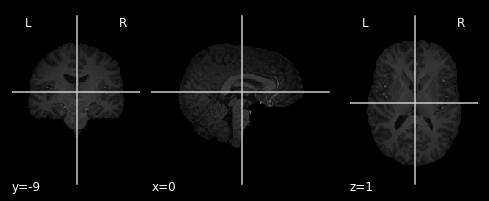

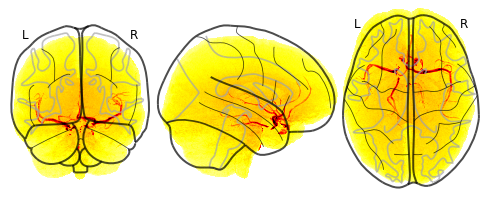

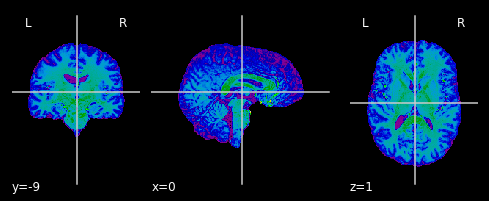

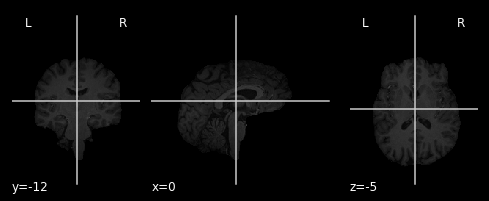

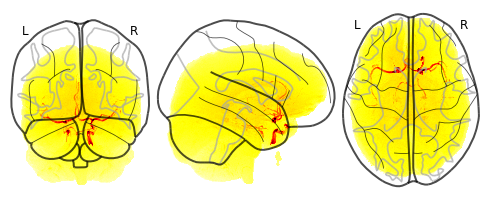

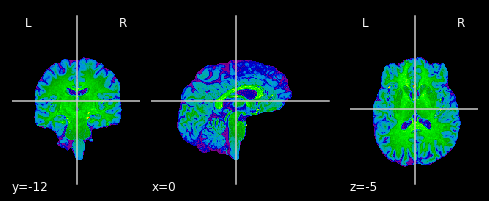

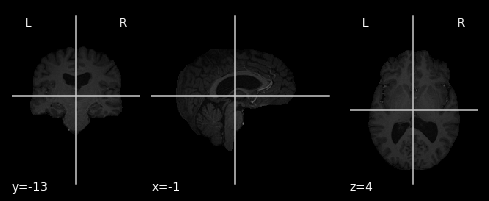

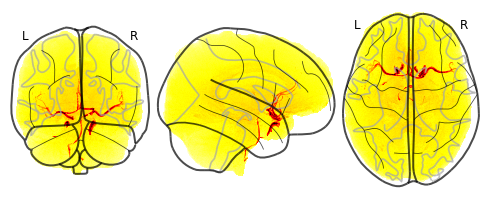

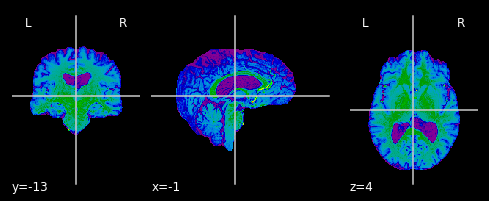

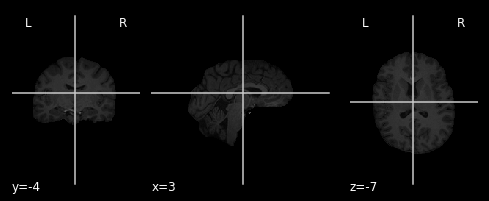

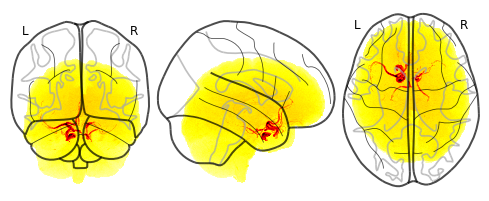

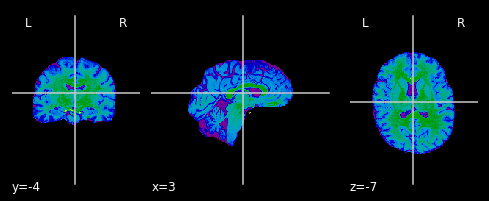

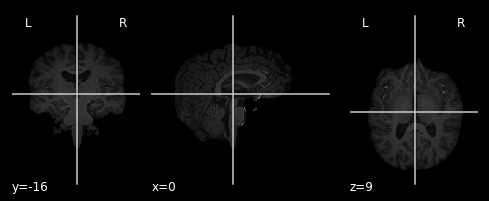

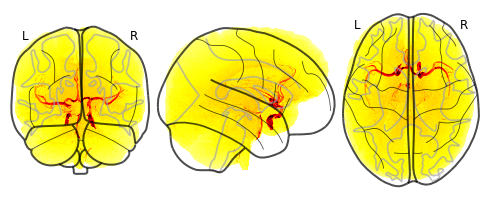

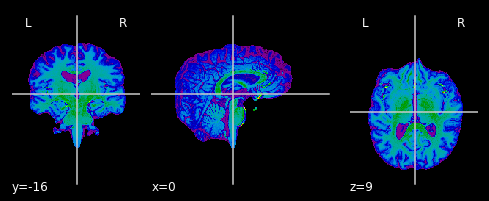

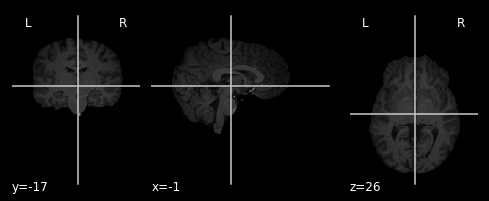

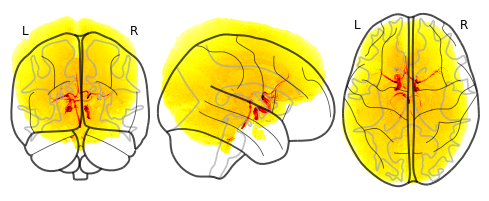

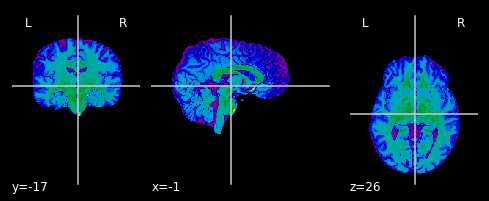

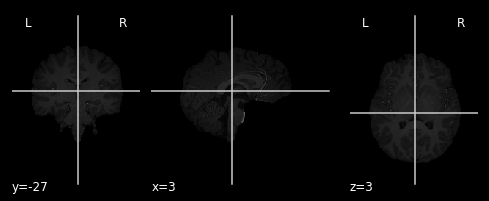

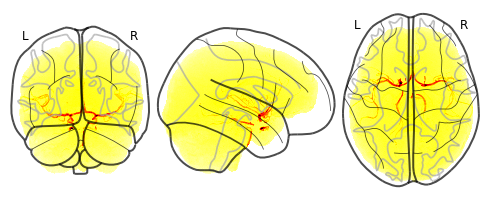

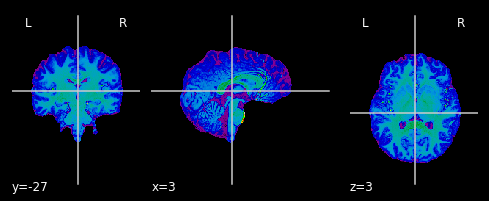

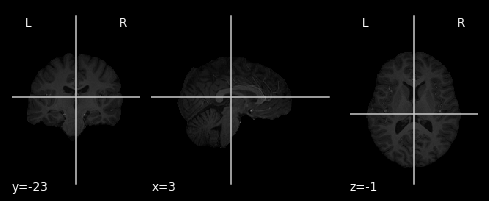

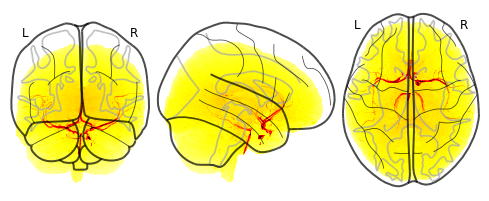

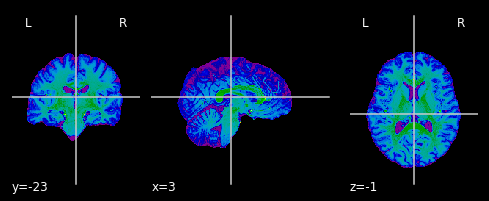

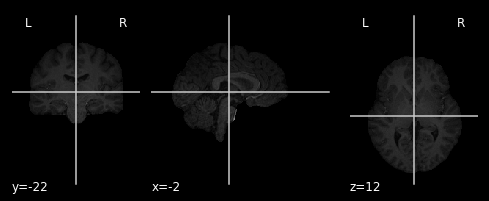

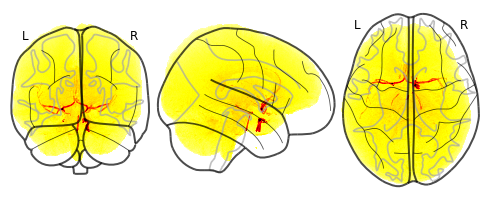

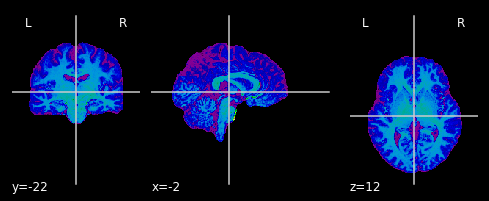

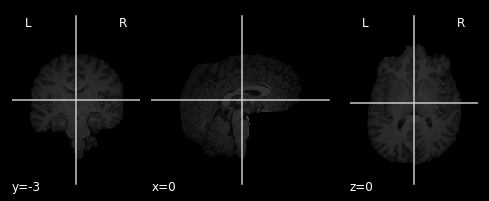

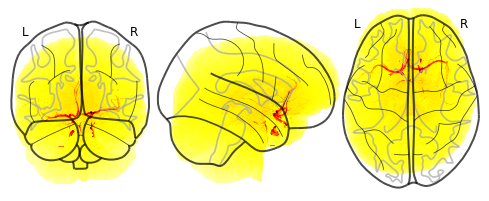

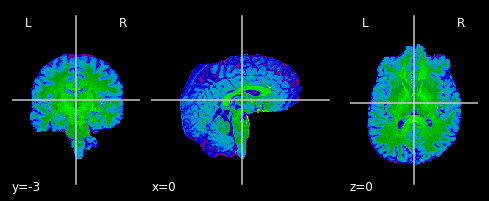

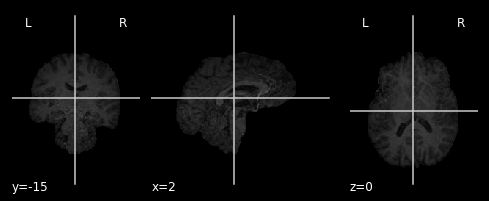

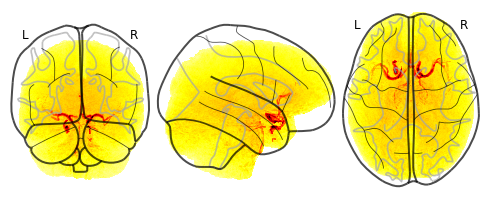

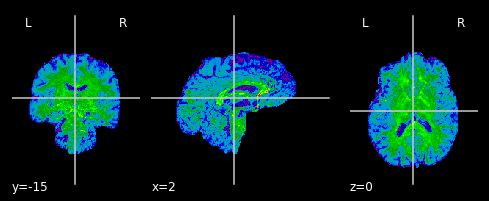

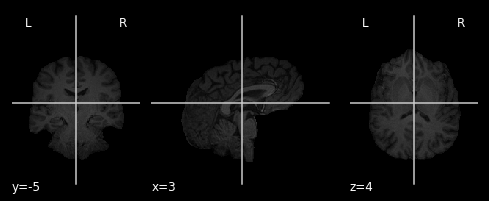

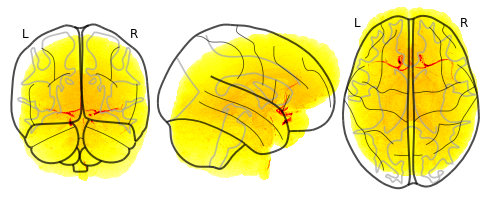

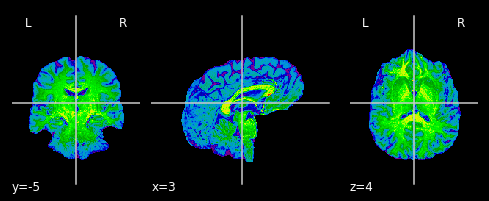

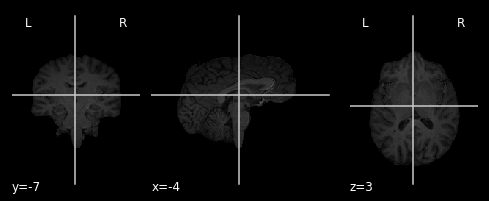

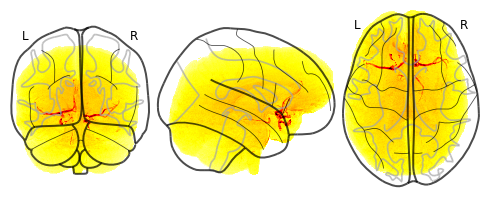

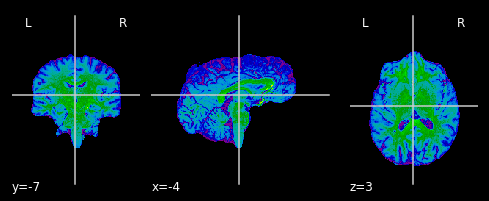

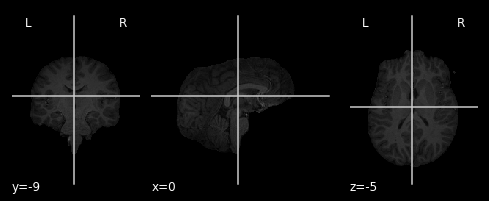

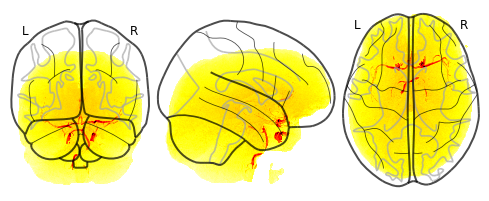

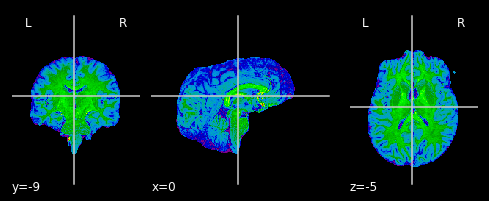

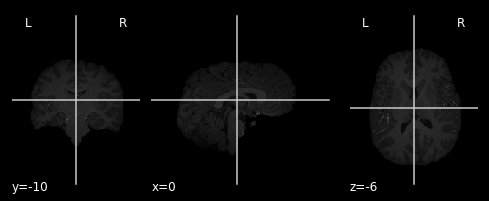

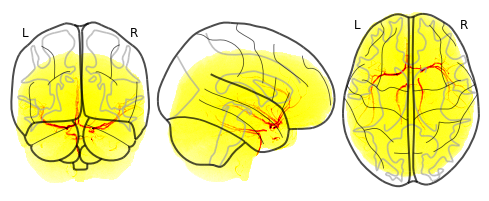

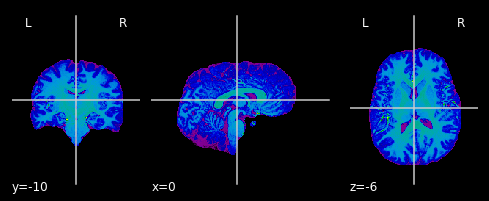

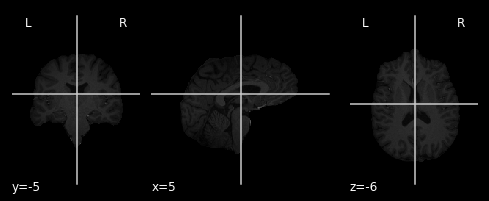

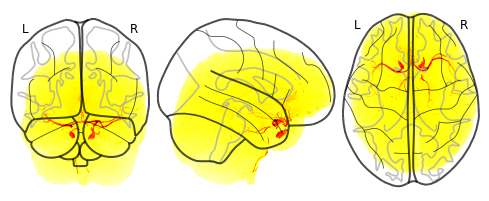

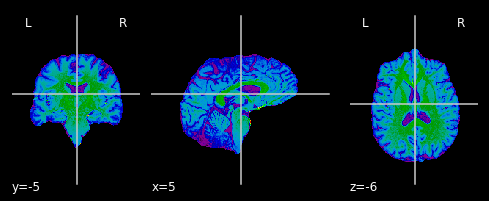

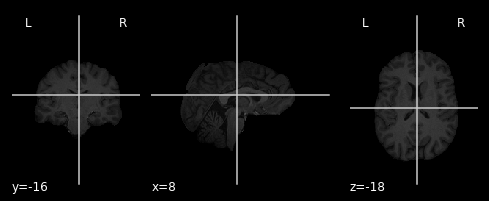

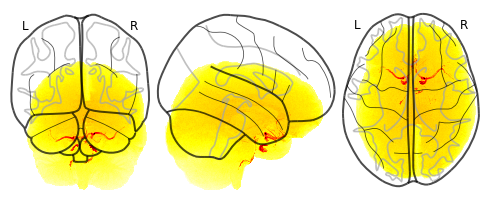

In [ ]:
for i in glob.glob("/content/drive/MyDrive/Autism_brain/*"):
  example = os.path.join(data_path,i)
  c = nib.load(example)
  plot_anat(c)
  plot_glass_brain(c)
  plot_epi(c)

### Visualization of Autism Brain mask Images

> Indented block



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.         1.0500001  1.0507812  1.0507812  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 94.78057
qoffset_y       : -130.65987
qoffset_z 

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_slicers.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.         1.0500001  1.0507812  1.0507812  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 87.51665
qoffset_y       : -132.53253
qoffset_z 

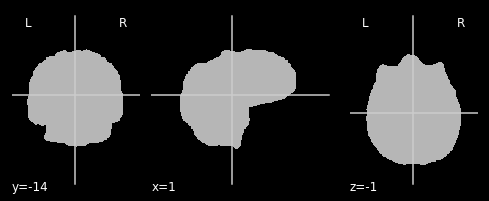

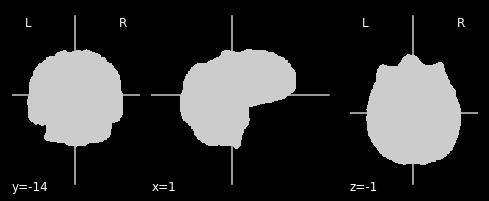

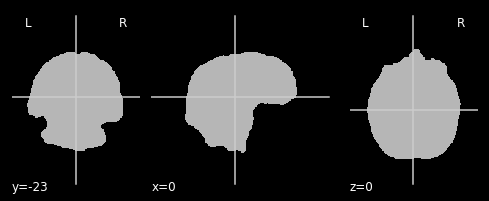

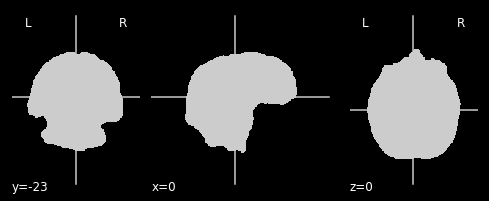

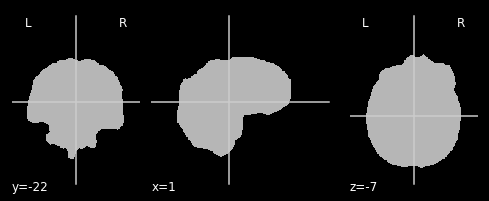

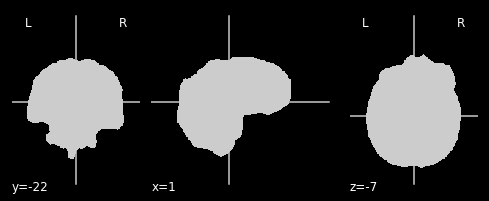

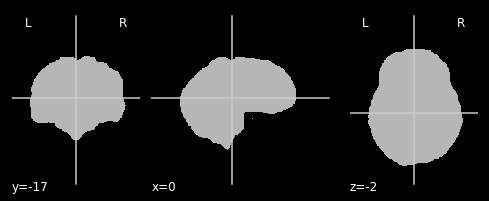

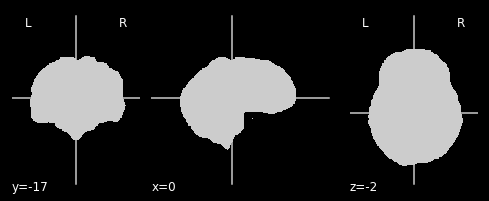

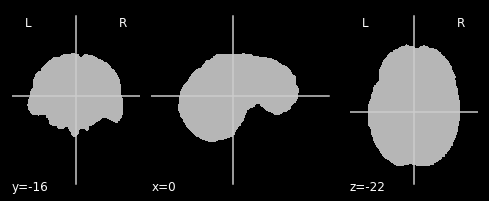

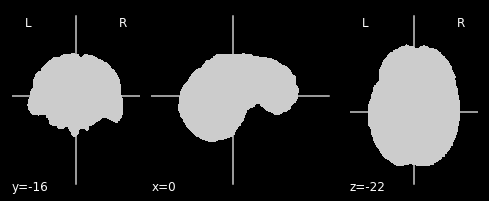

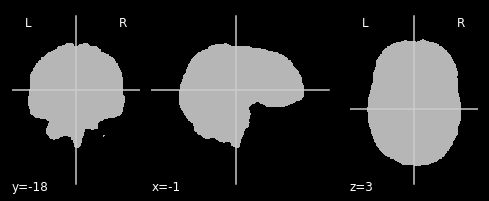

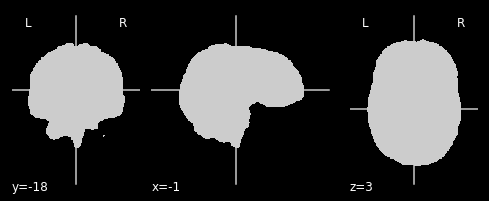

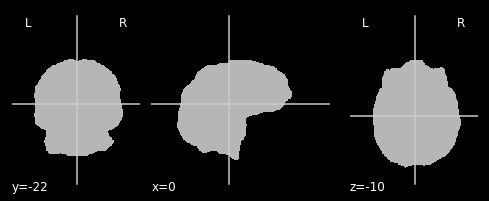

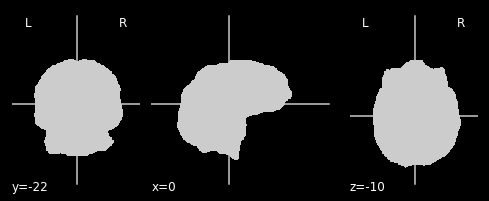

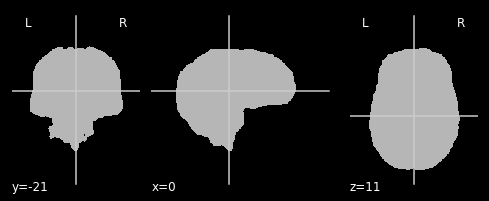

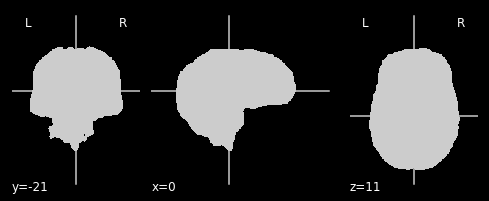

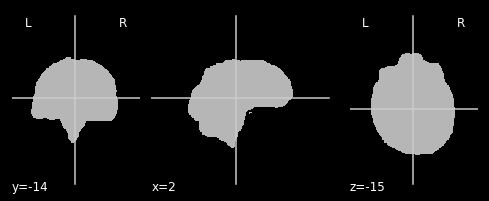

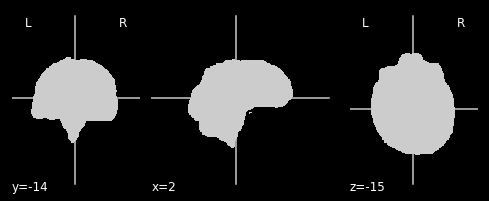

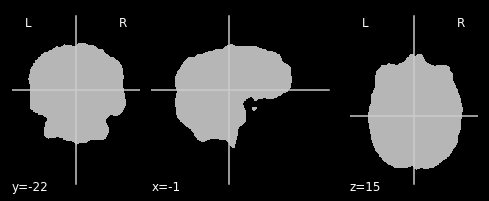

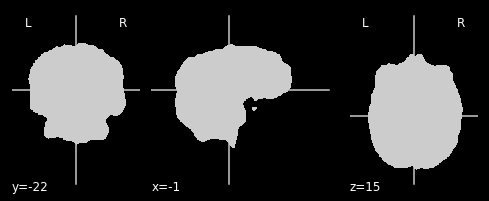

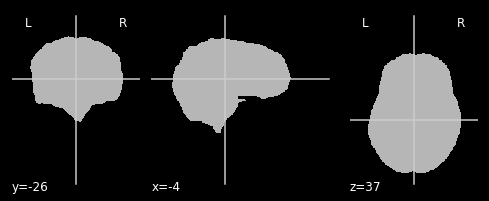

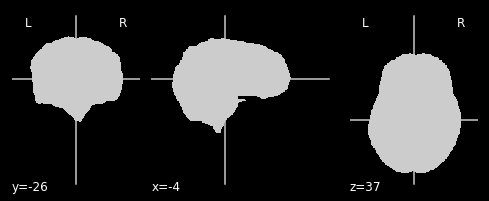

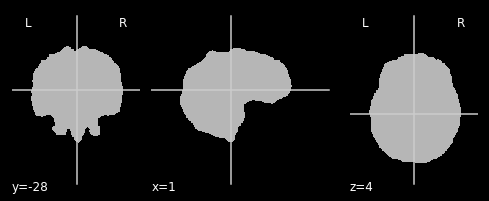

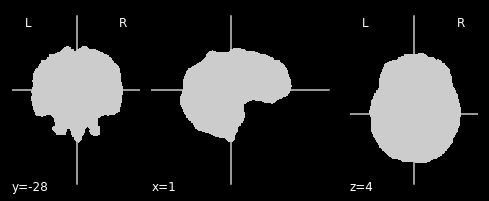

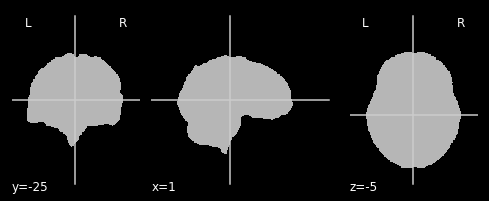

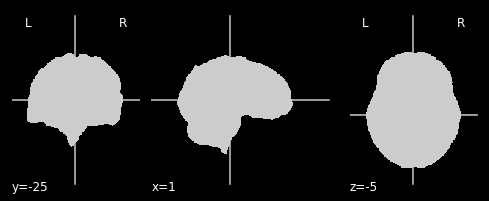

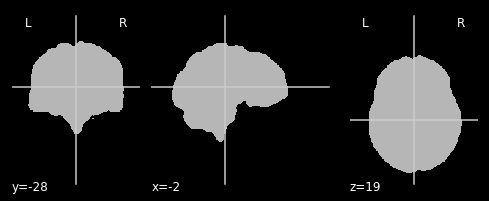

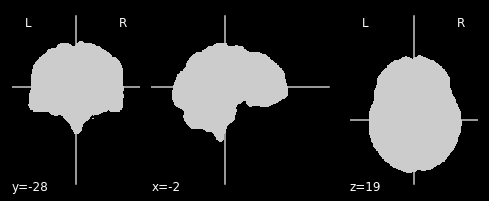

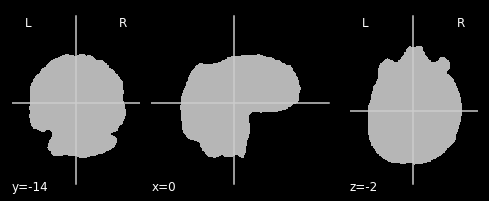

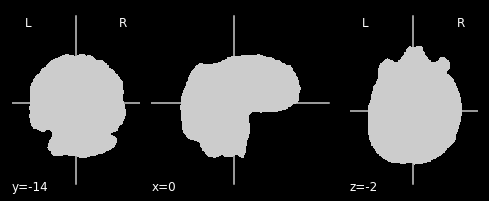

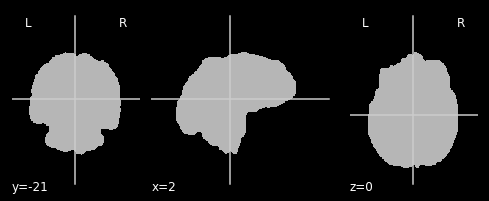

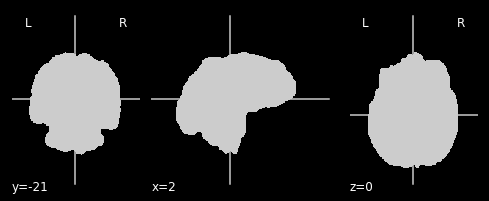

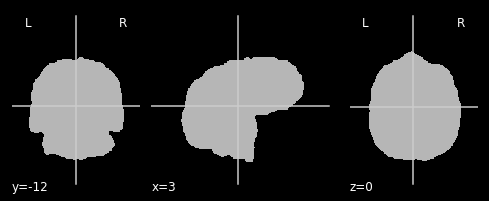

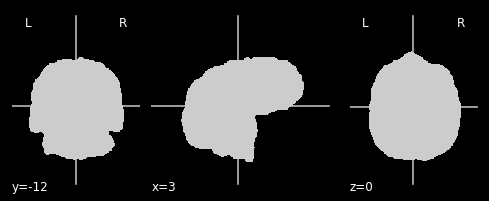

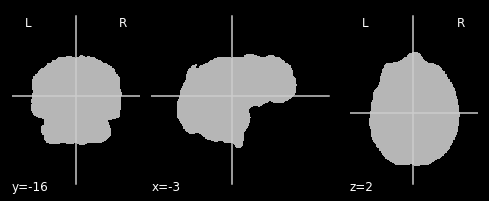

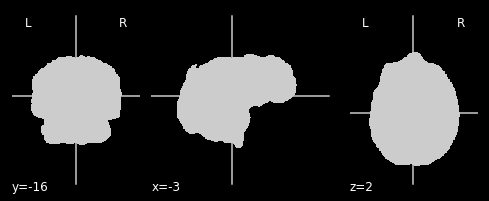

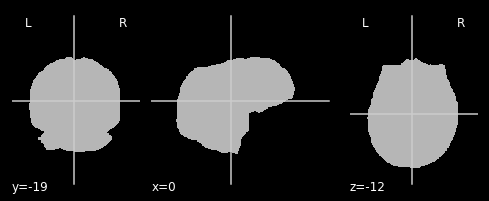

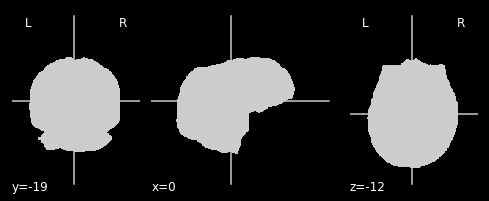

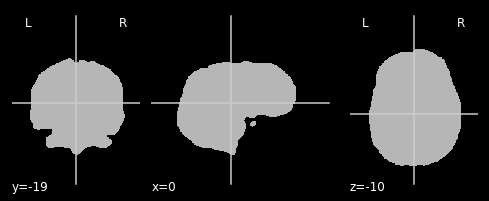

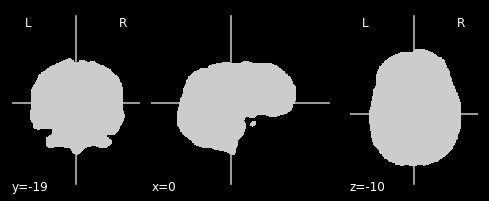

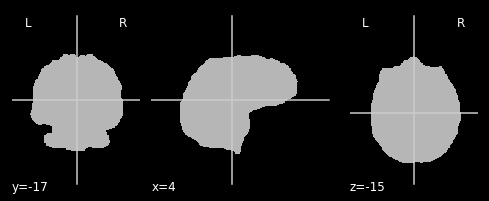

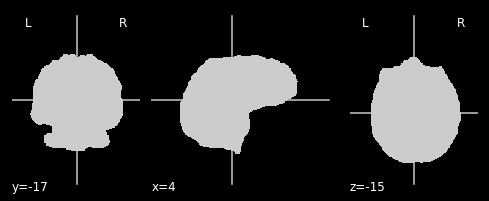

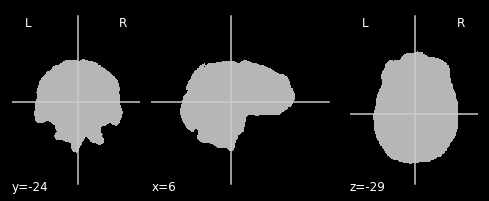

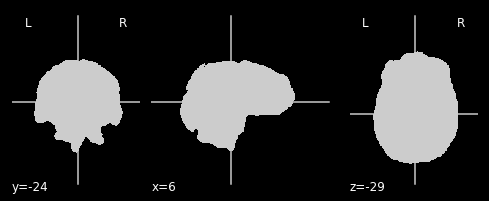

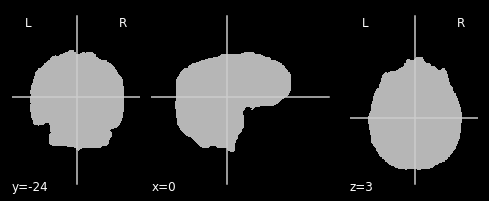

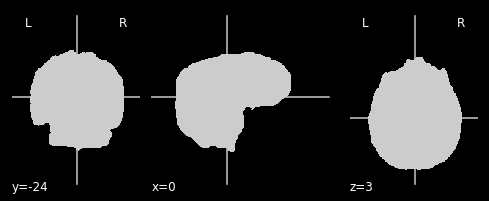

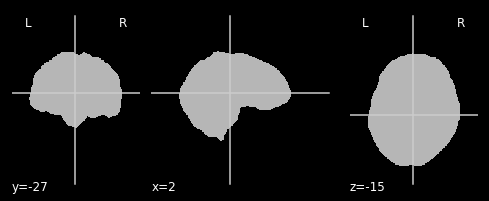

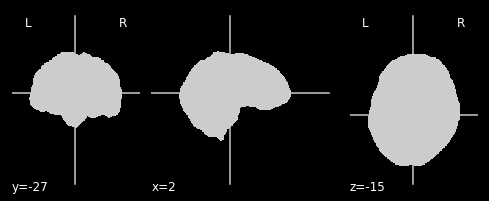

In [ ]:
for i in glob.glob("/content/drive/MyDrive/Autism_mask/*"):
  example = os.path.join(data_path,i)
  c = nib.load(example)
  plot_anat(c)
  plot_epi(c)
  c_h=c.header
  print(c_h)
  print("*************************************************")
  #print(example)

### Visualization of Control Brain mask Images

/usr/local/lib/python3.7/dist-packages/nilearn/plotting/displays/_slicers.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


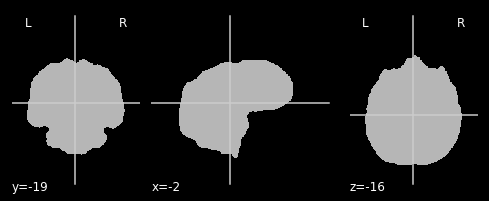

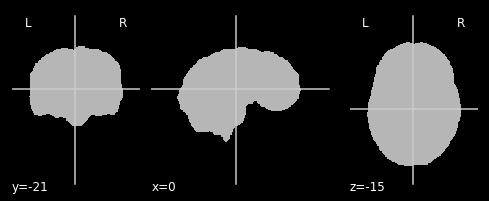

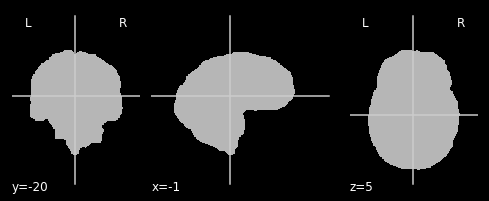

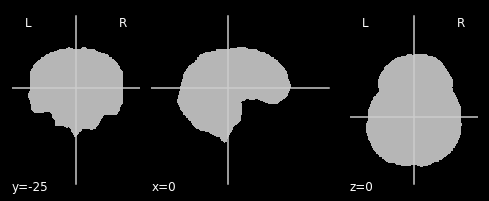

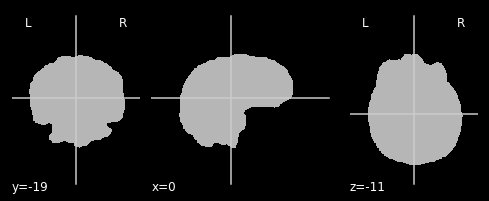

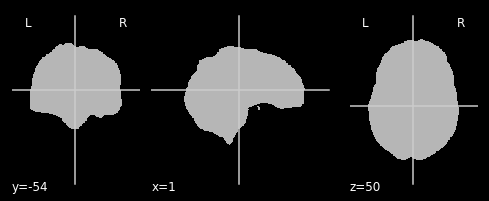

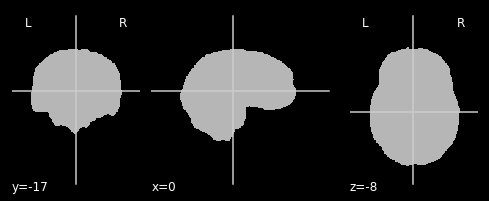

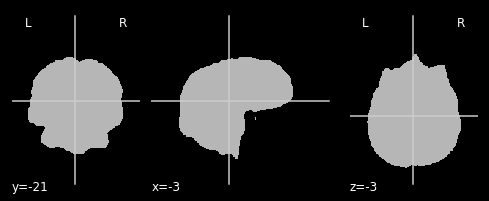

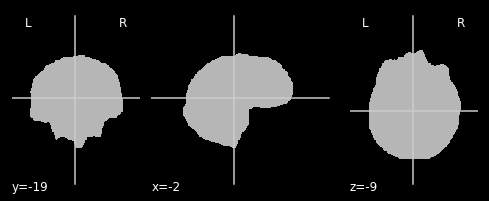

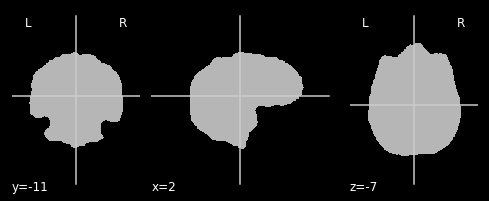

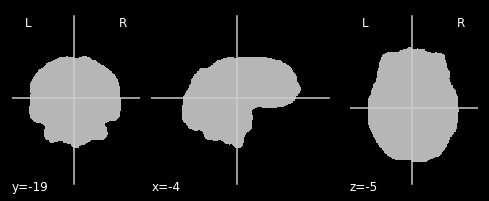

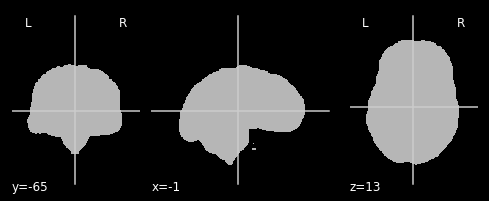

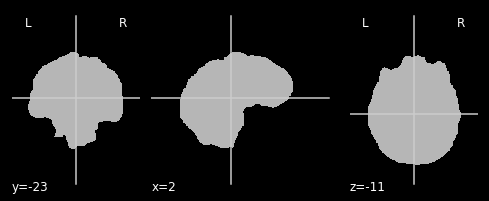

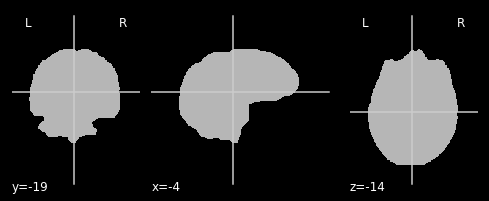

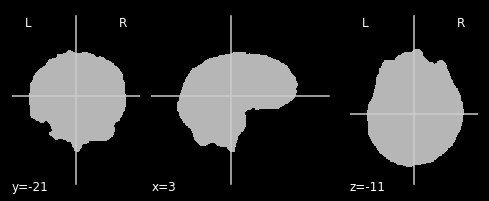

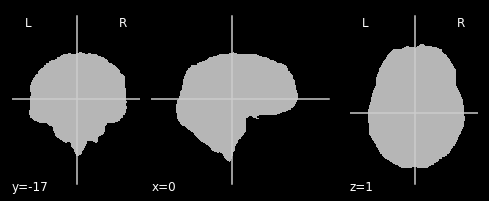

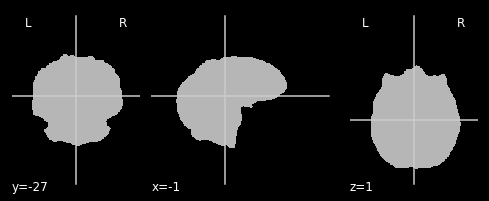

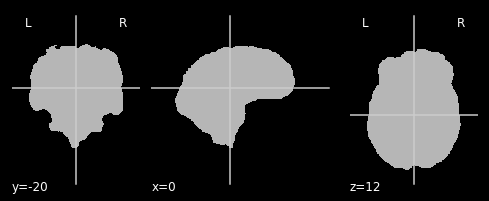

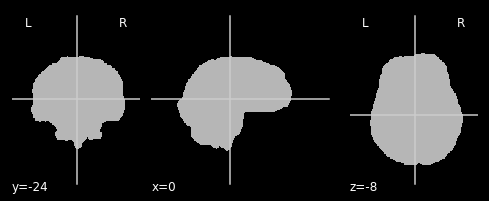

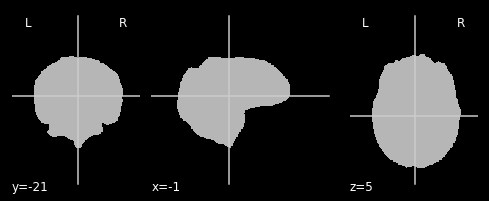

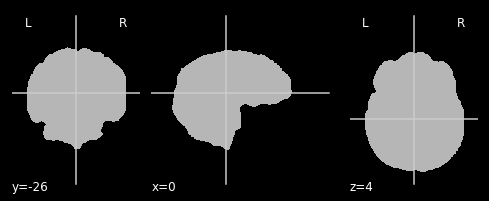

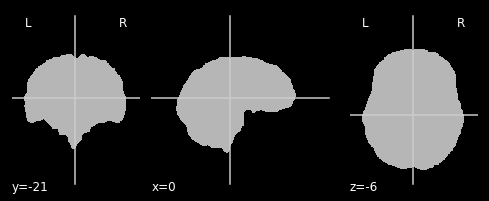

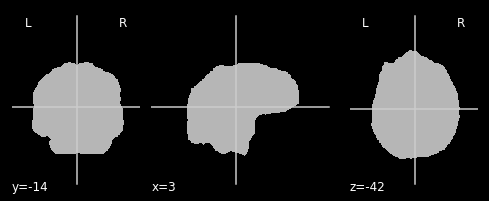

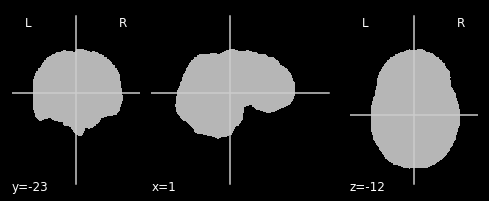

In [ ]:
for i in glob.glob("/content/drive/MyDrive/control_mask/*"):
  example = os.path.join(data_path,i)
  c = nib.load(example)
  plot_anat(c)
  #print(example)

In [ ]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

img = nib.load("/content/drive/MyDrive/Autism_data/ABIDE/50002/MP-RAGE/2000-01-01_00_00_00.0/S164623/ABIDE_50002_MRI_MP-RAGE_br_raw_20120830172854796_S164623_I328631_Autism.nii")
affine = img.affine
img = img.get_fdata()
ext = Extractor()

prob = ext.run(img)

mask = prob > 0.5


brain_mask = (1 * mask).astype(np.uint8)
brain_mask = nib.Nifti1Image(brain_mask, affine)
nib.save(brain_mask, os.path.join("/content/output_brain_mask", "brain_mask.nii"))

brain = img[:]
brain[~mask] = 0
brain = nib.Nifti1Image(brain, affine)
nib.save(brain, os.path.join("/content/Op_brain", "brain.nii"))

In [ ]:
epi_img = nib.load("/content/drive/MyDrive/Autism_data/ABIDE/50002/MP-RAGE/2000-01-01_00_00_00.0/S164623/ABIDE_50002_MRI_MP-RAGE_br_raw_20120830172854796_S164623_I328631_Autism.nii")
epi_img_data = epi_img.get_fdata()
epi_img_data.shape

(176, 256, 256)

Text(0.5, 0.98, 'Center slices for EPI image')

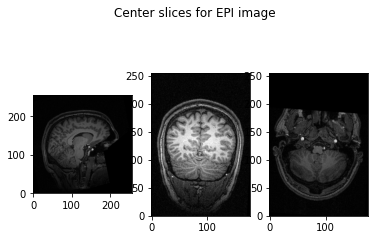

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")
slice_0 = epi_img_data[80, :, :]
slice_1 = epi_img_data[:, 80, :]
slice_2 = epi_img_data[:, :, 80]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")

In [ ]:
slice_0.shape

(256, 256)

Text(0.5, 0.98, 'Center slices for anatomical image')

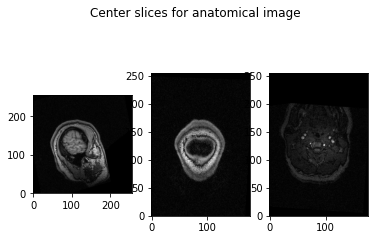

In [ ]:
show_slices([epi_img_data[28, :, :],
             epi_img_data[:, 33, :],
             epi_img_data[:, :, 28]])
plt.suptitle("Center slices for anatomical image")  

In [ ]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)
# Print the affine
epi_img.affine

array([[  -1.05 ,    0.   ,    0.   ,   94.781],
       [   0.   ,    1.051,    0.   , -130.66 ],
       [   0.   ,    0.   ,    1.051, -143.096],
       [   0.   ,    0.   ,    0.   ,    1.   ]])

In [ ]:
import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage 
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps 
# Skip 50:-50 slices since there is not much to see
epi_img = nib.load("/content/drive/MyDrive/Autism_brain/Autism0-brain.nii")
epi_img_data = epi_img.get_fdata()
epi_img_data.shape


(176, 256, 256)

In [ ]:
import nilearn.plotting as nlplt

ImportError: ignored

NameError: ignored

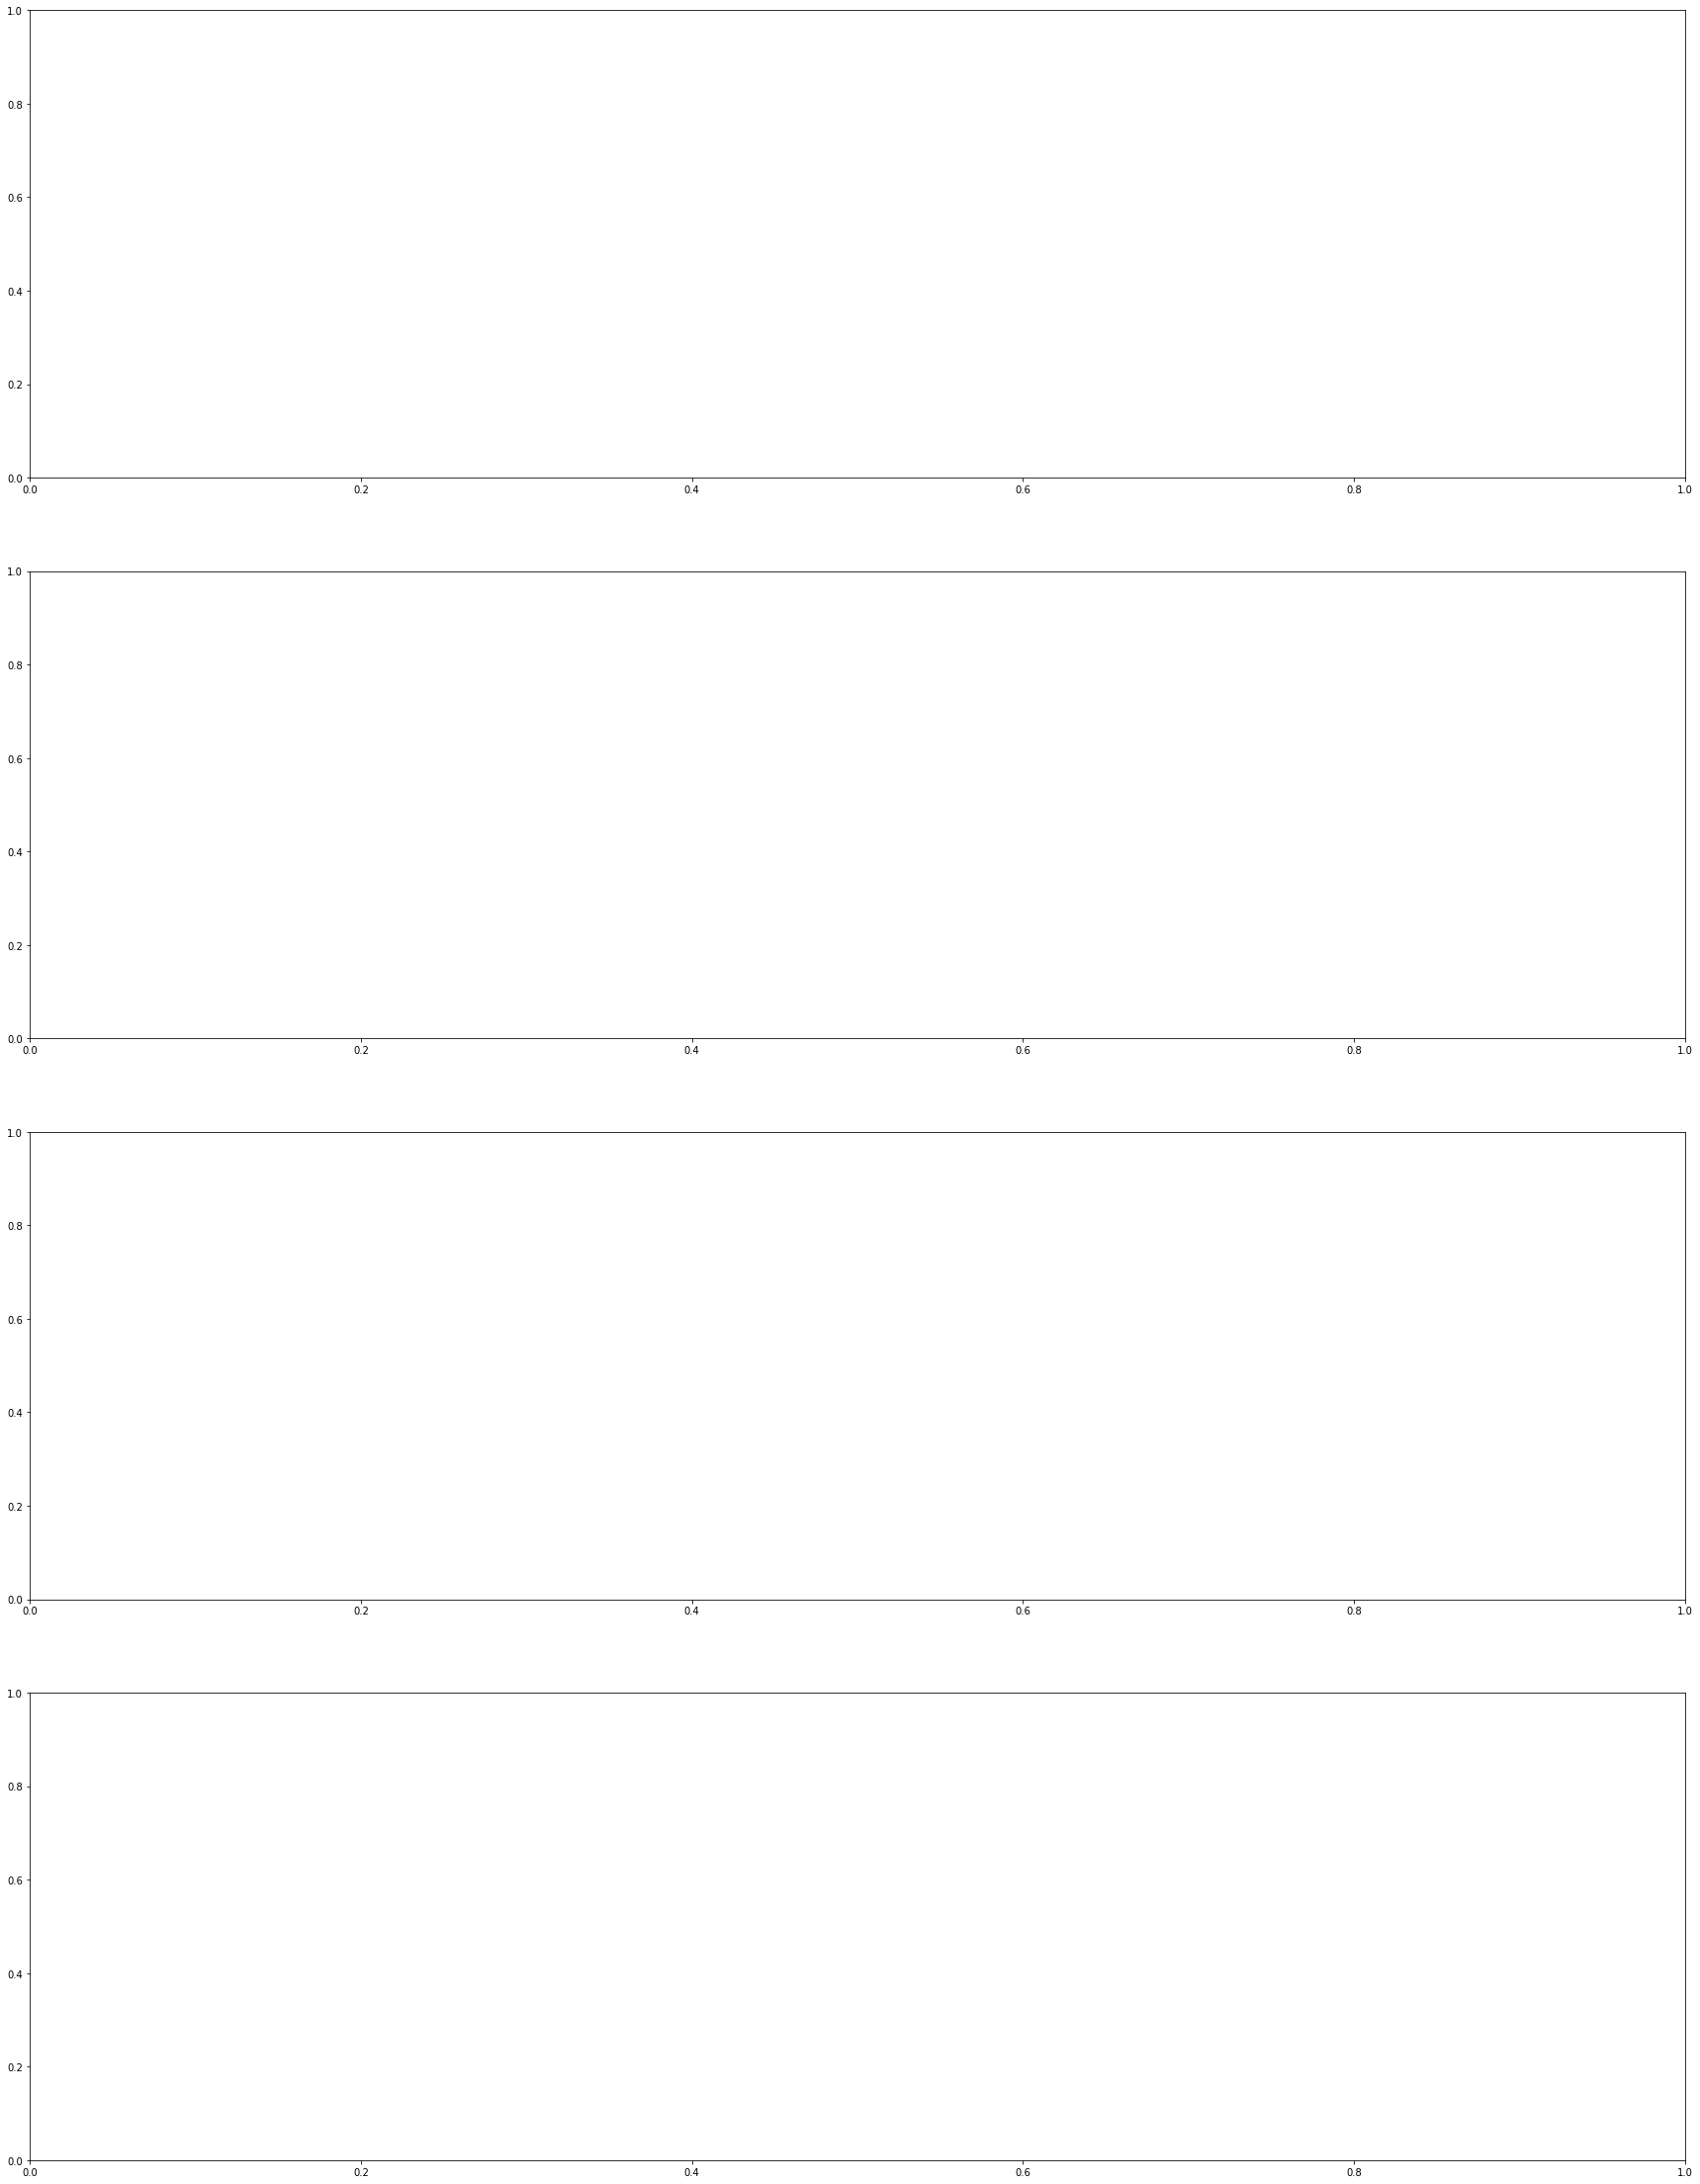

In [ ]:
nimask = nib.load("/content/drive/MyDrive/Autism_mask/Autism0-brain_mask.nii")
niimg = nib.load("/content/drive/MyDrive/Autism_brain/Autism0-brain.nii")
fig, axes = plt.subplots(nrows=4, figsize=(30, 40))
nlplt.plot_roi(nimask, 
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg, 
              axes=axes[3], cmap='Paired',colorbar=True)

plt.show()

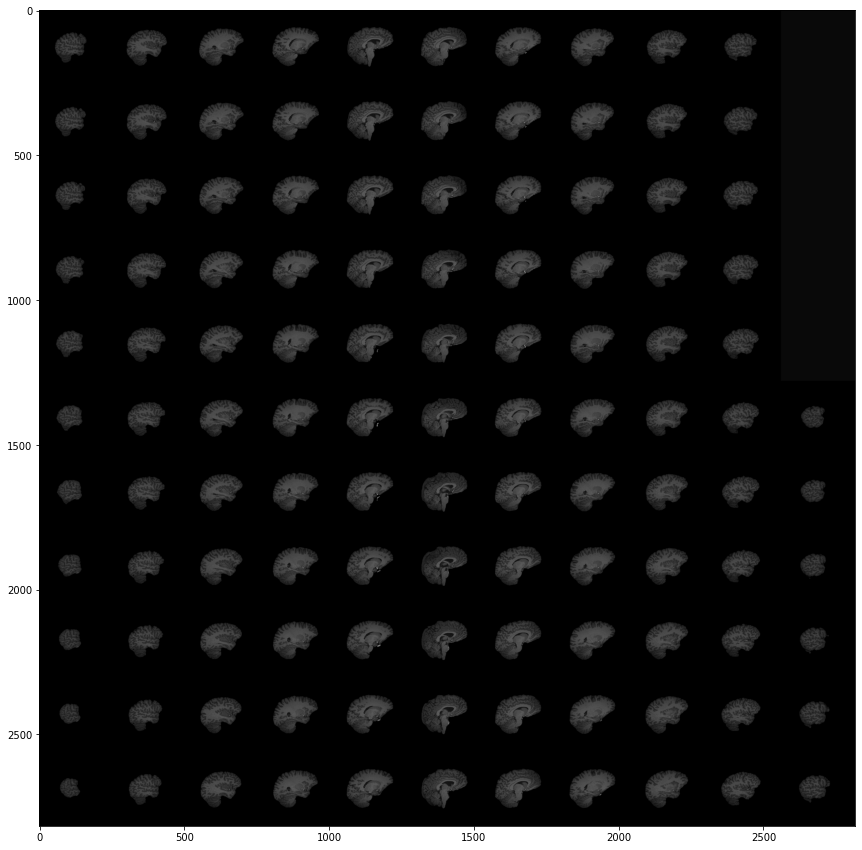

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
b=ax1.imshow(rotate(montage(epi_img_data[30:-30,:,:]), 90, resize=True), cmap ='gray')

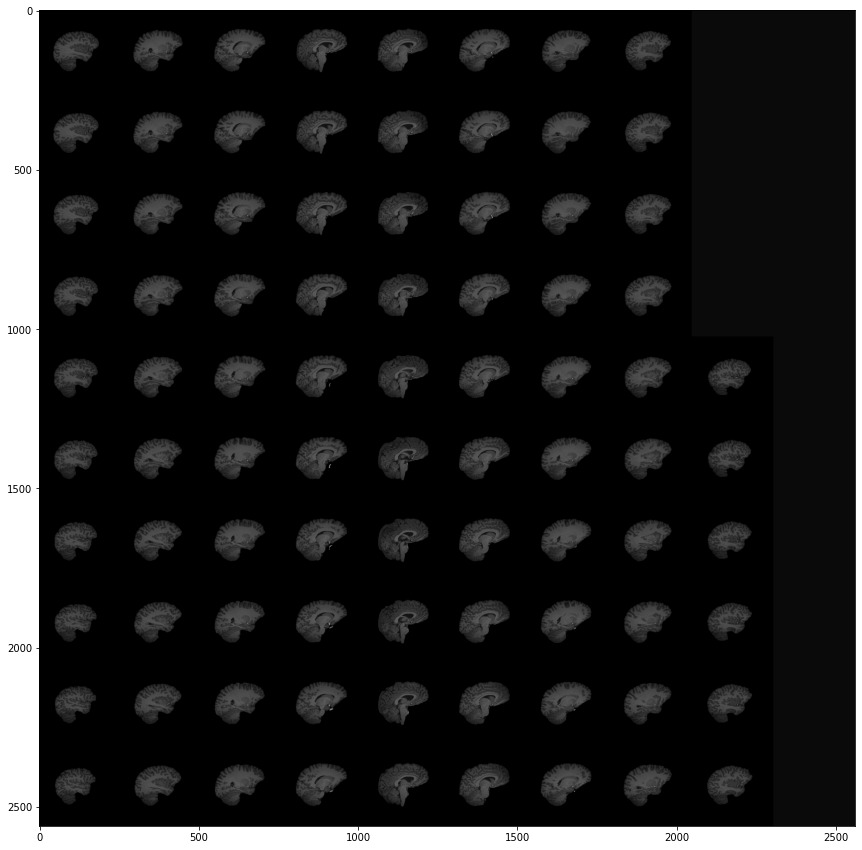

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(epi_img_data[45:-45,:,:]), 90, resize=False), cmap ='gray')